In [17]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('default')

In [18]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

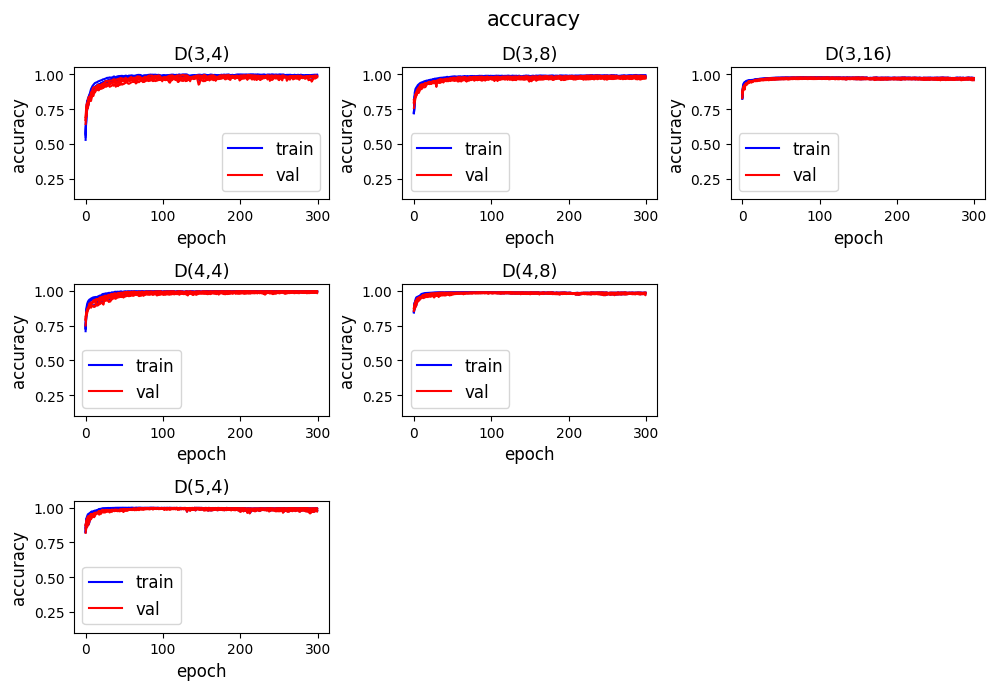

In [90]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False, length_cost=False)
plot_training_trajectory(all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 
### training and validation accuracies

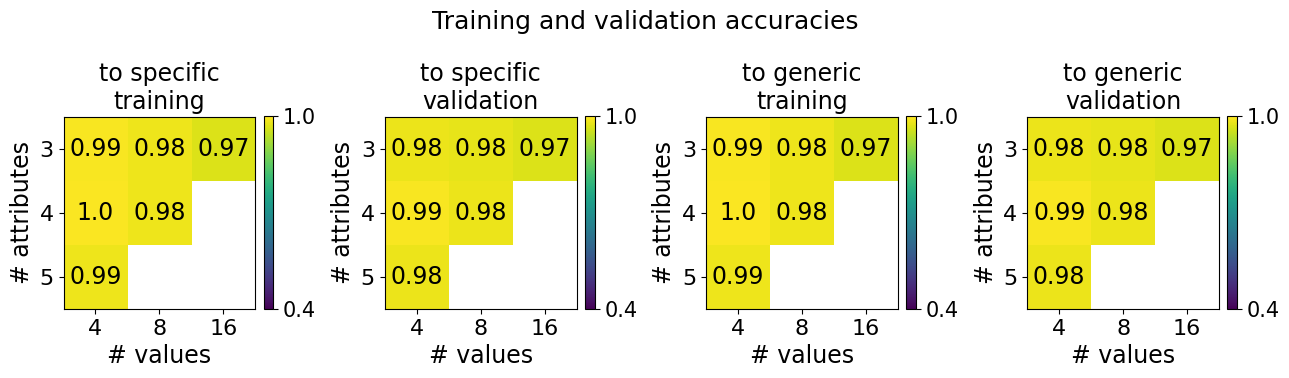

In [91]:
accuracies = [all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'],
              all_accuracies['zs_generic_train_acc'], all_accuracies['zs_generic_val_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='Training and validation accuracies', 
             titles=('to specific\ntraining', 'to specific\nvalidation', 'to generic\ntraining', 'to generic\nvalidation'),
             fontsize=17)

In [92]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs using the final accuracy at epoch 300
final_accs = acc_array[:,:,:,-1]
means = np.mean(final_accs, axis=2)
std_devs = np.std(final_accs, axis=2)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific training", "to specific validation", "to generic training", "to generic validation"]

# Prepare the data for the DataFrames
data1 = []
data2 = []

# iterate over datasets
for i in range(means.shape[1]):
    row1 = []
    row2 = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        if j < 2:
            row1.append(formatted_value)
        else:
            row2.append(formatted_value)
    data1.append(row1)
    data2.append(row2)

# Create DataFrames
df_1 = pd.DataFrame(data1, index=row_names, columns=col_names[:2])
df_2 = pd.DataFrame(data2, index=row_names, columns=col_names[2:])

# Convert DataFrames to LaTeX tables
latex_table_1 = df_1.to_latex(index=True, escape=False)
latex_table_2 = df_2.to_latex(index=True, escape=False)

print("To specific:")
print(latex_table_1)
print("\nTo generic:")
print(latex_table_2)


To specific:
\begin{tabular}{lll}
\toprule
{} & to specific training & to specific validation \\
\midrule
D(3,4)  &      0.99 $\pm$ 0.00 &        0.98 $\pm$ 0.00 \\
D(3,8)  &      0.98 $\pm$ 0.01 &        0.98 $\pm$ 0.01 \\
D(3,16) &      0.97 $\pm$ 0.01 &        0.97 $\pm$ 0.01 \\
D(4,4)  &      1.00 $\pm$ 0.00 &        0.99 $\pm$ 0.00 \\
D(4,8)  &      0.98 $\pm$ 0.00 &        0.98 $\pm$ 0.01 \\
D(5,4)  &      0.99 $\pm$ 0.01 &        0.98 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


To generic:
\begin{tabular}{lll}
\toprule
{} & to generic training & to generic validation \\
\midrule
D(3,4)  &     0.99 $\pm$ 0.00 &       0.98 $\pm$ 0.00 \\
D(3,8)  &     0.98 $\pm$ 0.01 &       0.98 $\pm$ 0.01 \\
D(3,16) &     0.97 $\pm$ 0.01 &       0.97 $\pm$ 0.01 \\
D(4,4)  &     1.00 $\pm$ 0.00 &       0.99 $\pm$ 0.00 \\
D(4,8)  &     0.98 $\pm$ 0.00 &       0.98 $\pm$ 0.01 \\
D(5,4)  &     0.99 $\pm$ 0.01 &       0.98 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/2418438258.py:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_1 = df_1.to_latex(index=True, escape=False)
/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/2418438258.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_2 = df_2.to_latex(index=True, escape=False)


### zero-shot test accuracies

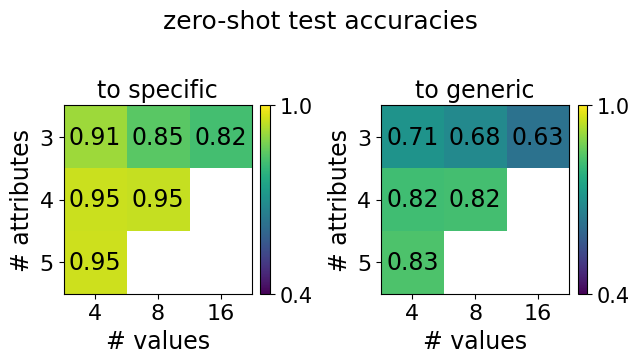

In [93]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,2), ylims=(0.4, 1.0), figsize=(6.5, 3.5), suptitle='zero-shot test accuracies', 
             titles=('to specific', 'to generic'),
             fontsize=17)

In [94]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs
means = np.mean(acc_array, axis=-1)
std_devs = np.std(acc_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific", "to generic"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)


\begin{tabular}{lll}
\toprule
{} &      to specific &       to generic \\
\midrule
D(3,4)  &  0.91 $\pm$ 0.02 &  0.71 $\pm$ 0.04 \\
D(3,8)  &  0.85 $\pm$ 0.01 &  0.68 $\pm$ 0.05 \\
D(3,16) &  0.82 $\pm$ 0.03 &  0.63 $\pm$ 0.03 \\
D(4,4)  &  0.95 $\pm$ 0.00 &  0.82 $\pm$ 0.04 \\
D(4,8)  &  0.95 $\pm$ 0.01 &  0.82 $\pm$ 0.07 \\
D(5,4)  &  0.95 $\pm$ 0.01 &  0.83 $\pm$ 0.06 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/1475190353.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


## Entropy scores

In [3]:
entropy_scores_specific, entropy_scores_generic = load_entropies_zero_shot(paths, context_unaware=False) # 
entropies_specific = [entropy_scores_specific['NMI'], entropy_scores_specific['effectiveness'], entropy_scores_specific['consistency']]
entropies_generic = [entropy_scores_generic['NMI'], entropy_scores_generic['effectiveness'], entropy_scores_generic['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:438: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_specific[key] = np.array(result_dict_specific[key])
/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:440: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_generic[key] = np.array(result_dict_generic[key])


### General

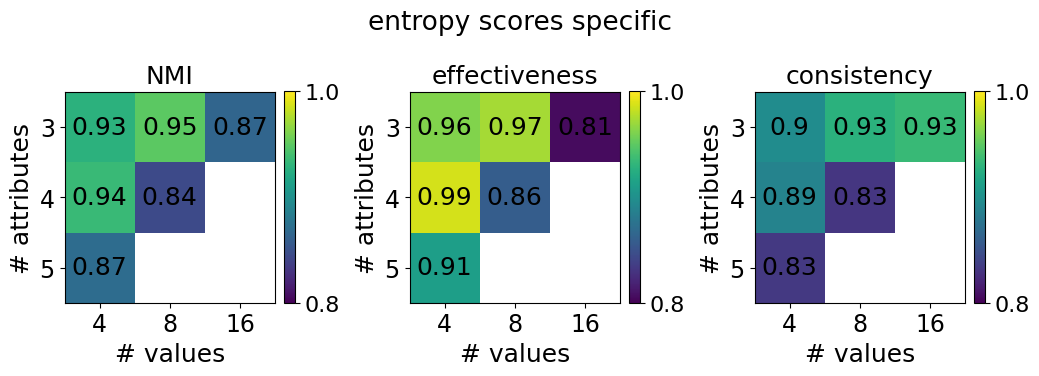

In [4]:
plot_heatmap(entropies_specific, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores specific')

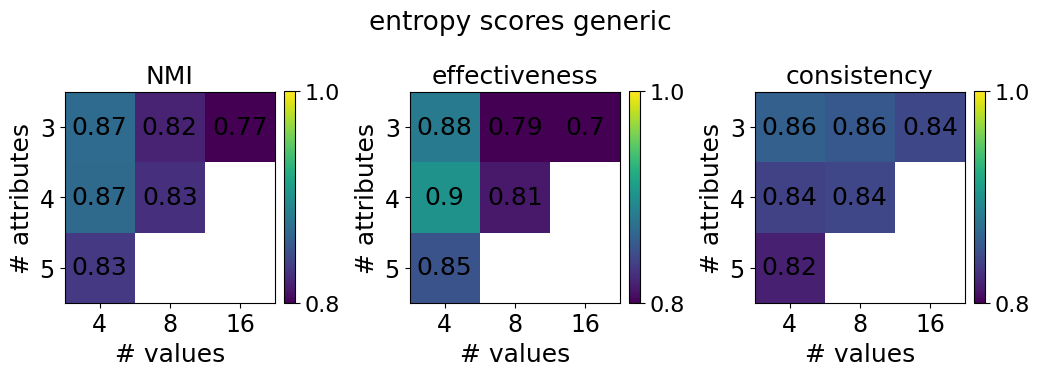

In [5]:
plot_heatmap(entropies_generic, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores generic')

#### Plotting Concept-level

In [67]:
for cond in ['specific', 'generic']:
    
    data_list, run_list, level_list = [], [], []
    NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []
    
    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/zero_shot/' + cond + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
            
            for l, level in enumerate([1, 2, 3, 4, 5]):  
                
                data_list.append(data)
                run_list.append(run)
                level_list.append(level)
                
                try: 
                    NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                    effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                    consistency_hierarchical.append(scores['consistency_hierarchical'][l])
                except: 
                    NMI_hierarchical.append(np.nan)
                    effectiveness_hierarchical.append(np.nan)
                    consistency_hierarchical.append(np.nan)
    
    if cond == 'specific':
        entropy_dict_hierarchical_specific = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_hierarchical, 
                                              'Effectiveness': effectiveness_hierarchical, 'Consistency': consistency_hierarchical}
    else:
        entropy_dict_hierarchical_generic = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_hierarchical, 
                                             'Effectiveness': effectiveness_hierarchical, 'Consistency': consistency_hierarchical}


In [72]:
all_hierarchical_specific = {}
all_hierarchical_specific['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 + ['NMI'] * 150 # change to 25 for one dataset
all_hierarchical_specific['value'] = (entropy_dict_hierarchical_specific['Effectiveness'] + 
                             entropy_dict_hierarchical_specific['Consistency'] +
                             entropy_dict_hierarchical_specific['NMI'])
all_hierarchical_specific['level'] = entropy_dict_hierarchical_specific['level'] * 3

all_hierarchical_generic = {}
all_hierarchical_generic['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 + ['NMI'] * 150 # change to 25 for one dataset
all_hierarchical_generic['value'] = (entropy_dict_hierarchical_generic['Effectiveness'] + 
                             entropy_dict_hierarchical_generic['Consistency'] +
                             entropy_dict_hierarchical_generic['NMI'])
all_hierarchical_generic['level'] = entropy_dict_hierarchical_generic['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: Al

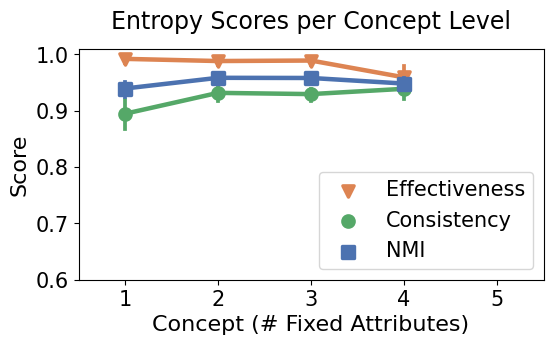

In [73]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=pd.DataFrame(all_hierarchical_specific), hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), 
                    scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Concept Level', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Concept (# Fixed Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: Al

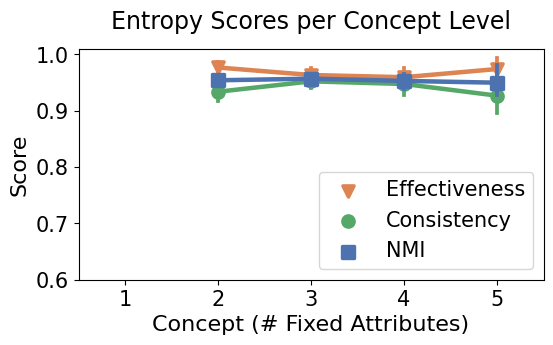

In [75]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=pd.DataFrame(all_hierarchical_generic), hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), 
                    scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Concept Level', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Concept (# Fixed Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

#### Plotting per Context condition

In [76]:
for cond in ['specific', 'generic']:
    
    data_list, run_list, level_list = [], [], []
    NMI_context_dep, effectiveness_context_dep, consistency_context_dep = [], [], []
    
    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/zero_shot/' + cond + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
            
            for l, level in enumerate([1, 2, 3, 4, 5]):  
                
                data_list.append(data)
                run_list.append(run)
                level_list.append(level)
                
                try: 
                    NMI_context_dep.append(scores['normalized_mutual_info_context_dep'][l])
                    effectiveness_context_dep.append(scores['effectiveness_context_dep'][l])
                    consistency_context_dep.append(scores['consistency_context_dep'][l])
                except: 
                    NMI_context_dep.append(np.nan)
                    effectiveness_context_dep.append(np.nan)
                    consistency_context_dep.append(np.nan)
    
    if cond == 'specific':
        entropy_dict_context_dep_specific = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                                             'Effectiveness': effectiveness_context_dep, 'Consistency': consistency_context_dep}
    else:
        entropy_dict_context_dep_generic = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                                            'Effectiveness': effectiveness_context_dep, 'Consistency': consistency_context_dep}


In [80]:
all_context_dep_specific = {}
all_context_dep_specific['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 +['NMI'] * 150 
all_context_dep_specific['value'] = (entropy_dict_context_dep_specific['Effectiveness'] + 
                             entropy_dict_context_dep_specific['Consistency'] +
                             entropy_dict_context_dep_specific['NMI']
                            )
all_context_dep_specific['level'] = entropy_dict_context_dep_specific['level'] * 3

all_context_dep_generic = {}
all_context_dep_generic['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 +['NMI'] * 150 
all_context_dep_generic['value'] = (entropy_dict_context_dep_generic['Effectiveness'] + 
                             entropy_dict_context_dep_generic['Consistency'] +
                             entropy_dict_context_dep_generic['NMI']
                            )
all_context_dep_generic['level'] = entropy_dict_context_dep_specific['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: Al

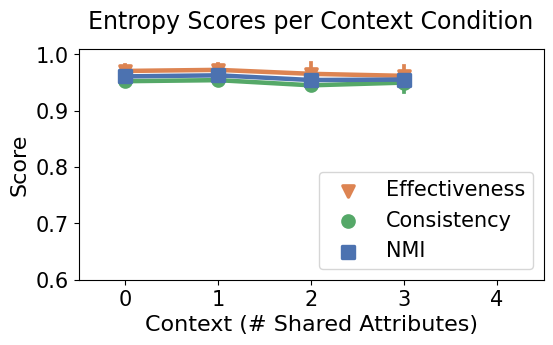

In [81]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_context_dep_specific, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), 
                   scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Context Condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Context (# Shared Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


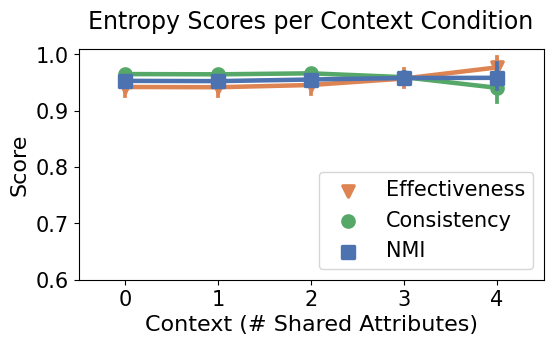

In [82]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_context_dep_generic, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), 
                   scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Context Condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Context (# Shared Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()